In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

In [2]:
#menamai ulang data
from pyspark.sql.types import StructType, StructField, IntegerType,StringType 

schema = StructType([
    StructField("Transaction_id", StringType(), True),
    StructField("Price", IntegerType(), True),
    StructField("Date", StringType(), True),
    StructField("Property", StringType(), True),
    StructField("Old", StringType(), True),
    StructField("Duration", StringType(), True),
    StructField("Town", StringType(), True),
    StructField("District", StringType(), True),
    StructField("County", StringType(), True),
    StructField("PPDCategory ", StringType(), True),
    StructField("Record  ", StringType(), True)
])
data = spark.read.csv("D:/File/Kuliah/Semester 8/Big/price_paid_records.csv", header=True, schema=schema)

In [3]:
data.createOrReplaceTempView("penjualan")

In [4]:
#mengambil data
result = spark.sql("SELECT DISTINCT Town, count(*) as Jumlah FROM penjualan GROUP BY Town ORDER BY Jumlah DESC limit 10")
result.show()


+-----------+-------+
|       Town| Jumlah|
+-----------+-------+
|     LONDON|1784194|
| MANCHESTER| 366133|
|    BRISTOL| 344839|
| BIRMINGHAM| 330358|
| NOTTINGHAM| 292532|
|      LEEDS| 252680|
|  LIVERPOOL| 223324|
|  SHEFFIELD| 212669|
|  LEICESTER| 197593|
|SOUTHAMPTON| 184882|
+-----------+-------+



In [5]:
import pixiedust
from pyspark.ml.feature import VectorAssembler


Pixiedust database opened successfully


In [6]:
import pixiedust


In [7]:
#merubah ke dalam vector
assembler = VectorAssembler(inputCols=["Jumlah"], outputCol='features')

result=assembler.transform(result)
result.show()

+-----------+-------+-----------+
|       Town| Jumlah|   features|
+-----------+-------+-----------+
|     LONDON|1784194|[1784194.0]|
| MANCHESTER| 366133| [366133.0]|
|    BRISTOL| 344839| [344839.0]|
| BIRMINGHAM| 330358| [330358.0]|
| NOTTINGHAM| 292532| [292532.0]|
|      LEEDS| 252680| [252680.0]|
|  LIVERPOOL| 223324| [223324.0]|
|  SHEFFIELD| 212669| [212669.0]|
|  LEICESTER| 197593| [197593.0]|
|SOUTHAMPTON| 184882| [184882.0]|
+-----------+-------+-----------+



In [8]:
#training Model
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(result)

In [9]:
#membuat Prediksi
prediction = model.transform(result)
prediction.show()

+-----------+-------+-----------+----------+
|       Town| Jumlah|   features|prediction|
+-----------+-------+-----------+----------+
|     LONDON|1784194|[1784194.0]|         1|
| MANCHESTER| 366133| [366133.0]|         2|
|    BRISTOL| 344839| [344839.0]|         2|
| BIRMINGHAM| 330358| [330358.0]|         2|
| NOTTINGHAM| 292532| [292532.0]|         0|
|      LEEDS| 252680| [252680.0]|         0|
|  LIVERPOOL| 223324| [223324.0]|         4|
|  SHEFFIELD| 212669| [212669.0]|         4|
|  LEICESTER| 197593| [197593.0]|         3|
|SOUTHAMPTON| 184882| [184882.0]|         3|
+-----------+-------+-----------+----------+



In [10]:
#evaluasi
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(prediction)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.7084533589939581


In [11]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[272606.]
[1784194.]
[347110.]
[191237.5]
[217996.5]



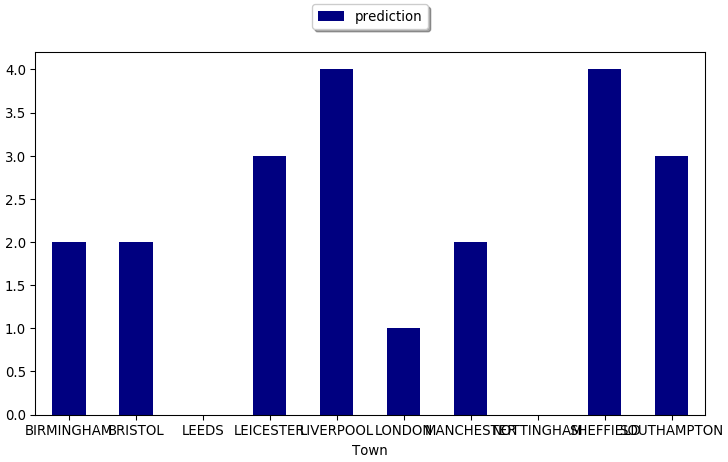

In [ ]:
#visualisasi
display(prediction)

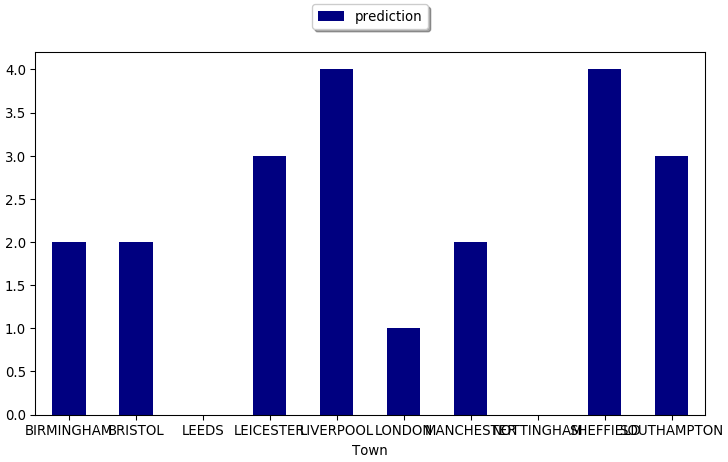

In [60]:
from IPython.display import Image 
Image(filename='gambar/gambar1.png')

In [13]:
result = spark.sql("SELECT District,count(*) as jumlah FROM penjualan GROUP BY District ORDER BY jumlah DESC")
result.show()


+--------------------+------+
|            District|jumlah|
+--------------------+------+
|          BIRMINGHAM|332091|
|               LEEDS|299133|
|            BRADFORD|198163|
|          MANCHESTER|181363|
|           SHEFFIELD|181222|
|     CITY OF BRISTOL|174853|
|          WANDSWORTH|156602|
|            KIRKLEES|151424|
|           LIVERPOOL|150032|
|EAST RIDING OF YO...|145974|
|             BROMLEY|139391|
|             CROYDON|138675|
|             CARDIFF|134115|
|   BRIGHTON AND HOVE|129872|
|              BARNET|127957|
|       MILTON KEYNES|121297|
|              WIRRAL|118954|
|           WAKEFIELD|115435|
|           STOCKPORT|114488|
|            COVENTRY|114432|
+--------------------+------+
only showing top 20 rows



In [14]:
assembler = VectorAssembler(inputCols=["jumlah"], outputCol='features')
result=assembler.transform(result)
result.show()

+--------------------+------+----------+
|            District|jumlah|  features|
+--------------------+------+----------+
|          BIRMINGHAM|332091|[332091.0]|
|               LEEDS|299133|[299133.0]|
|            BRADFORD|198163|[198163.0]|
|          MANCHESTER|181363|[181363.0]|
|           SHEFFIELD|181222|[181222.0]|
|     CITY OF BRISTOL|174853|[174853.0]|
|          WANDSWORTH|156602|[156602.0]|
|            KIRKLEES|151424|[151424.0]|
|           LIVERPOOL|150032|[150032.0]|
|EAST RIDING OF YO...|145974|[145974.0]|
|             BROMLEY|139391|[139391.0]|
|             CROYDON|138675|[138675.0]|
|             CARDIFF|134115|[134115.0]|
|   BRIGHTON AND HOVE|129872|[129872.0]|
|              BARNET|127957|[127957.0]|
|       MILTON KEYNES|121297|[121297.0]|
|              WIRRAL|118954|[118954.0]|
|           WAKEFIELD|115435|[115435.0]|
|           STOCKPORT|114488|[114488.0]|
|            COVENTRY|114432|[114432.0]|
+--------------------+------+----------+
only showing top


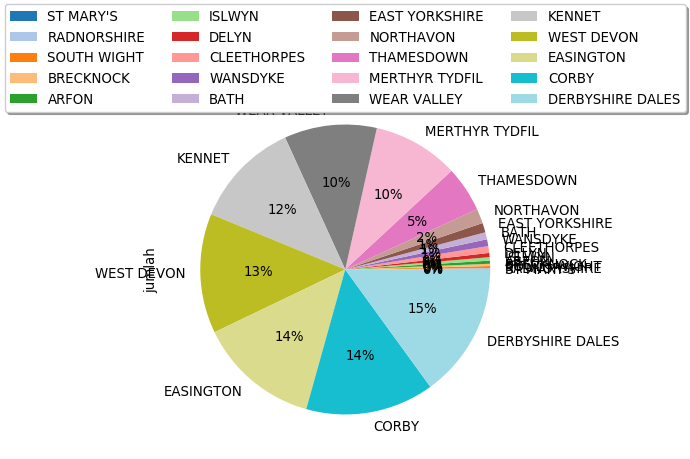

In [15]:
#visualisasi district yang terjual
display(result)

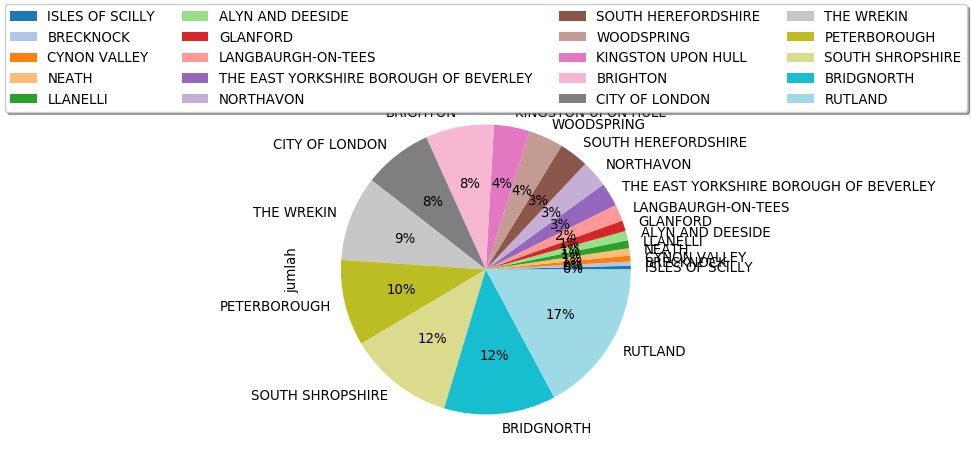

In [61]:
from IPython.display import Image 
Image(filename='gambar/gambar2.png')